In [105]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd

sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/')
sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/utils')
sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/models')

from utils.analysis import *
from utils.getters import * 
from utils.plotters import * 
from models_config.model_config_GSP import *
import matplotlib.pyplot as plt

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {
    'text.usetex' : True,
    'font.size' : 12,
    'font.family' : 'lmodern'
}
plt.rcParams.update(params)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/1j/5s36wz6s0jlb1k64vsq1k2zh0000gn/T/ipykernel_52356/988531199.py:17: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]


In [106]:
labels = [
        "Bank of the Superior Temporal Sulcus",#1
        "Caudal Anterior-cingulate Cortex",#2
        "Caudal Middle Frontal Gyrus",#3
        "Unmeasured Corpus Callosum",#4
        "Cunesus Cortex",#5
        "Entorhinal Cortex",#6
        "Fusiform Gyrus",#7
        "Inferior Parietal Cortex",#8
        "Inferior Temporal Gyrus",#9
        "Isthmus-cingulate Cortex",#10
        "Lateral occipital cortex",#11
        "Lateral orbital frontal cortex",#12
        "Lingual gyrus",#13
        "Medial orbital frontal cortex",#14
        "Middle temporal gyrus",#15
        "Parahippocampal gyrus",#16
        "Paracentral lobule",#17
        "Pars opercularis",#18
        "Pars orbitalis",#19
        "Pars triangularis",#20
        "Pericalcarine cortex",#21
        "Postcentral gyrus",#22
        "Posterior-cingulate cortex",#23
        "Precentral gyrus",#24
        "Precuneus cortex",#25
        "Rostral anterior cingulate cortex",#26
        "Rostral middle frontal gyrus",#£7
        "Superior frontal gyrus",#28
        "Superior parietal cortex",#29
        "Superior temporal gyrus",#30
        "Supramarginal gyrus",#31
        "Frontal pole",#32
        "Temporal pole",#33
        "Transverse temporal cortex",#34
        "Insula cortex"#35
]

In [107]:
def extract_weights(dataset, view, model, run, student, model_args=None):
    weights = []
    for cv_n in range(3):
        weights.append(get_weight(dataset, view, model, "3Fold", 0, cv_n, run, student, model_args=model_args))
    for cv_n in range(5):
        weights.append(get_weight(dataset, view, model, "5Fold", 0, cv_n, run, student, model_args=model_args))
    for cv_n in range(10):
        weights.append(get_weight(dataset, view, model, "10Fold", 0, cv_n, run, student, model_args=model_args))
    
    return weights

In [108]:
dataset_split="val"
dataset = "gender_data"

dis = []

for run in range(10):

    all_views_dis = []
    all_views_no_dis = []

    for view in [0,2,4,5]:

        dis_view = []
        
        for student in [0,1,2,3]:
            dis_view.append(extract_weights(dataset=dataset, 
                            view=view, 
                            model=gcn_student_lsp_ensamble_4_args["model_name"], 
                            run=run, 
                            student=student, 
                            model_args=gcn_student_lsp_ensamble_4_args))
        
        all_views_dis.append(dis_view)

    dis.append(all_views_dis)


In [109]:
#2,1,2,1

In [110]:
x = [np.abs(np.mean(dis[0][0][2],axis=0)), np.abs(np.mean(dis[0][1][1],axis=0)), np.abs(np.mean(dis[0][2][2],axis=0)), np.abs(np.mean(dis[0][3][1],axis=0))]

In [111]:
x = np.mean(x, axis=0)

In [112]:
x

array([0.13072726, 0.13951984, 0.11718448, 0.05603635, 0.15121764,
       0.12207612, 0.08546476, 0.11959788, 0.10563517, 0.07958572,
       0.09139051, 0.07531274, 0.15088941, 0.12047654, 0.06034484,
       0.07263748, 0.05835674, 0.04134506, 0.08323871, 0.04535076,
       0.05926897, 0.1346688 , 0.08365707, 0.16205174, 0.17513928,
       0.06115662, 0.09999743, 0.12043419, 0.09372913, 0.08389772,
       0.05551011, 0.07964937, 0.050348  , 0.08112493, 0.02001393],
      dtype=float32)

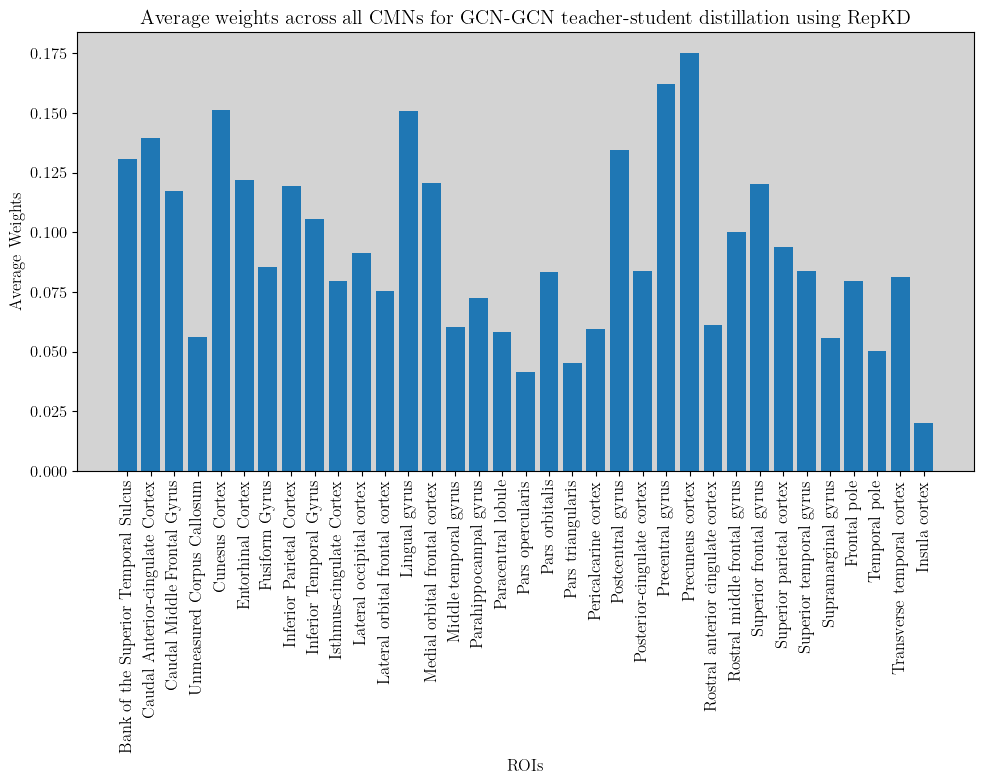

In [113]:
import numpy as np
import matplotlib.pyplot as plt

data = x
x = np.arange(len(labels))

plt.figure(figsize=(10, 8))
plt.bar(x, data, align='center')
plt.xticks(x, labels, rotation=90)
plt.gca().set_facecolor('lightgrey')
plt.xlabel('ROIs')
plt.ylabel('Average Weights')
plt.title('Average weights across all CMNs for GCN-GCN teacher-student distillation using RepKD')
plt.tight_layout()
plt.savefig('Average weights across all CMNs fro GCN-GCN teacher-student distillation using RepKD.pdf', format='pdf')
plt.show()


In [114]:
np.argsort(-x)

array([34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18,
       17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,
        0])

In [115]:
labels[24],  labels[23],  labels[4],  labels[12],  labels[1]

('Precuneus cortex',
 'Precentral gyrus',
 'Cunesus Cortex',
 'Lingual gyrus',
 'Caudal Anterior-cingulate Cortex')

In [116]:
#cingulate cortex, medial and lateral frontal cortex, temporoparietal regions, insula, and precuneus.

In [117]:
#TODO DO FOR ALL OF THE MODELS AND SEE IF THEY FIND THE SAME REGIONS 

In [118]:
from models_config.model_config_GSP import *

dataset_split="val"
dataset = "gender_data"

dis = []

for run in range(10):

    all_views_dis = []
    all_views_no_dis = []

    for view in [0,2,4,5]:

        dis_view = []
        
        for student in [0,1,2,3]:
            dis_view.append(extract_weights(dataset=dataset, 
                            view=view, 
                            model=gcn_gat_student_lsp_ensamble_4_args["model_name"], 
                            run=run, 
                            student=student, 
                            model_args=gcn_gat_student_lsp_ensamble_4_args))
        
        all_views_dis.append(dis_view)

    dis.append(all_views_dis)


In [119]:
x = [np.abs(np.mean(dis[0][0][1],axis=0)), np.abs(np.mean(dis[0][1][3],axis=0)), np.abs(np.mean(dis[0][2][1],axis=0)), np.abs(np.mean(dis[0][3][3],axis=0))]
x = np.mean(x, axis=0)

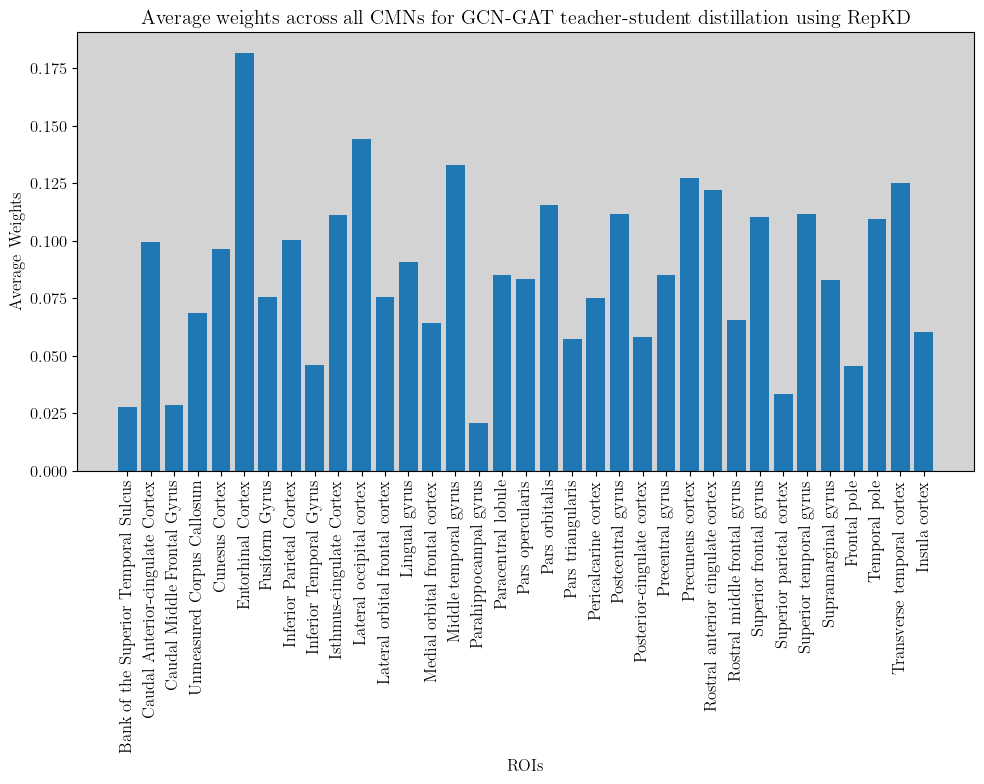

In [120]:
import numpy as np
import matplotlib.pyplot as plt

data = x
x = np.arange(len(labels))

plt.figure(figsize=(10, 8))
plt.bar(x, data, align='center')
plt.xticks(x, labels, rotation=90)
plt.gca().set_facecolor('lightgrey')
plt.xlabel('ROIs')
plt.ylabel('Average Weights')
plt.title('Average weights across all CMNs for GCN-GAT teacher-student distillation using RepKD')
plt.tight_layout()
plt.savefig('Average weights across all CMNs fro GCN-GAT teacher-student distillation using RepKD.pdf', format='pdf')
plt.show()


In [121]:
np.argsort(-x)

array([34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18,
       17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,
        0])

In [122]:
a = [5, 10, 14, 24, 33, 25, 18, 29, 21,  9, 27, 32,  7,  1,  4, 12, 23, 16]
b = [24, 23,  4, 12,  1, 21,  0,  5, 13, 27,  7,  2,  8, 26, 28, 10,  6, 29]
list(set(a) & set(b))

[1, 4, 5, 7, 10, 12, 21, 23, 24, 27, 29]

In [123]:
from models_config.model_config_GSP import *

dataset_split="val"
dataset = "gender_data"

dis = []

for run in range(10):

    all_views_dis = []
    all_views_no_dis = []

    for view in [0,2,4,5]:

        dis_view = []
        
        for student in [0,1]:
            dis_view.append(extract_weights(dataset=dataset, 
                            view=view, 
                            model=gat_gat_student_lsp_ensamble_2_args["model_name"], 
                            run=run, 
                            student=student, 
                            model_args=gat_gat_student_lsp_ensamble_2_args))
        
        all_views_dis.append(dis_view)

    dis.append(all_views_dis)


In [124]:
x = [np.abs(np.mean(dis[0][0][1],axis=0)), np.abs(np.mean(dis[0][1][1],axis=0)), np.abs(np.mean(dis[0][2][1],axis=0)), np.abs(np.mean(dis[0][3][0],axis=0))]
x = np.mean(x, axis=0)


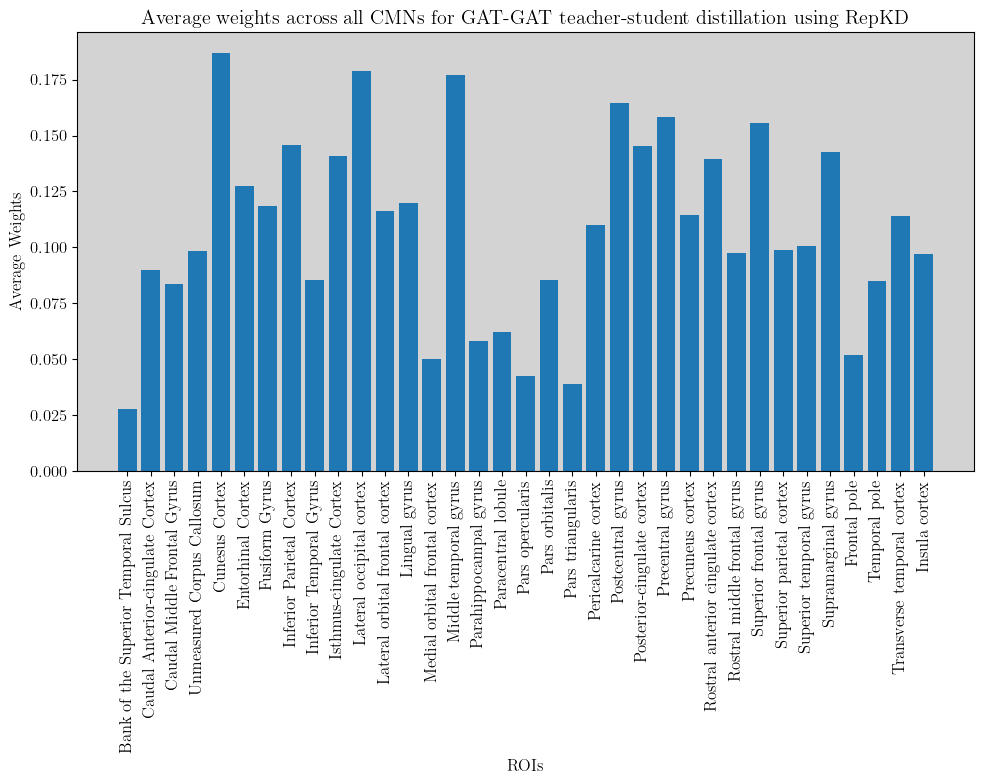

In [125]:
import numpy as np
import matplotlib.pyplot as plt

data = x
x = np.arange(len(labels))

plt.figure(figsize=(10, 8))
plt.bar(x, data, align='center')
plt.xticks(x, labels, rotation=90)
plt.gca().set_facecolor('lightgrey')
plt.xlabel('ROIs')
plt.ylabel('Average Weights')
plt.title('Average weights across all CMNs for GAT-GAT teacher-student distillation using RepKD')
plt.tight_layout()
plt.savefig('Average weights across all CMNs fro GAT-GAT teacher-student distillation using RepKD.pdf', format='pdf')
plt.show()

In [126]:
np.argsort(-x)

array([34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18,
       17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,
        0])

In [127]:
c = [4, 10, 14, 21, 23, 27,  7, 22, 30,  9, 25,  5, 12,  6, 11, 24, 33, 20]
d = [1, 4, 5, 7, 10, 12, 21, 23, 24, 27, 29]
list(set(c) & set(d))

[4, 5, 7, 10, 12, 21, 23, 24, 27]

In [128]:
from models_config.model_config_GSP import *

dataset_split="val"
dataset = "gender_data"

dis = []

for run in range(10):

    all_views_dis = []
    all_views_no_dis = []

    for view in [0,2,4,5]:

        dis_view = []
        
        for student in [0,1,2,3]:
            dis_view.append(extract_weights(dataset=dataset, 
                            view=view, 
                            model=gat_student_lsp_ensamble_4_args["model_name"], 
                            run=run, 
                            student=student, 
                            model_args=gat_student_lsp_ensamble_4_args))
        
        all_views_dis.append(dis_view)

    dis.append(all_views_dis)


In [129]:
[3,1,2,1]
x = [np.abs(np.mean(dis[0][0][3],axis=0)), np.abs(np.mean(dis[0][1][1],axis=0)), np.abs(np.mean(dis[0][2][1],axis=0)), np.abs(np.mean(dis[0][3][1],axis=0))]
x = np.mean(x, axis=0)


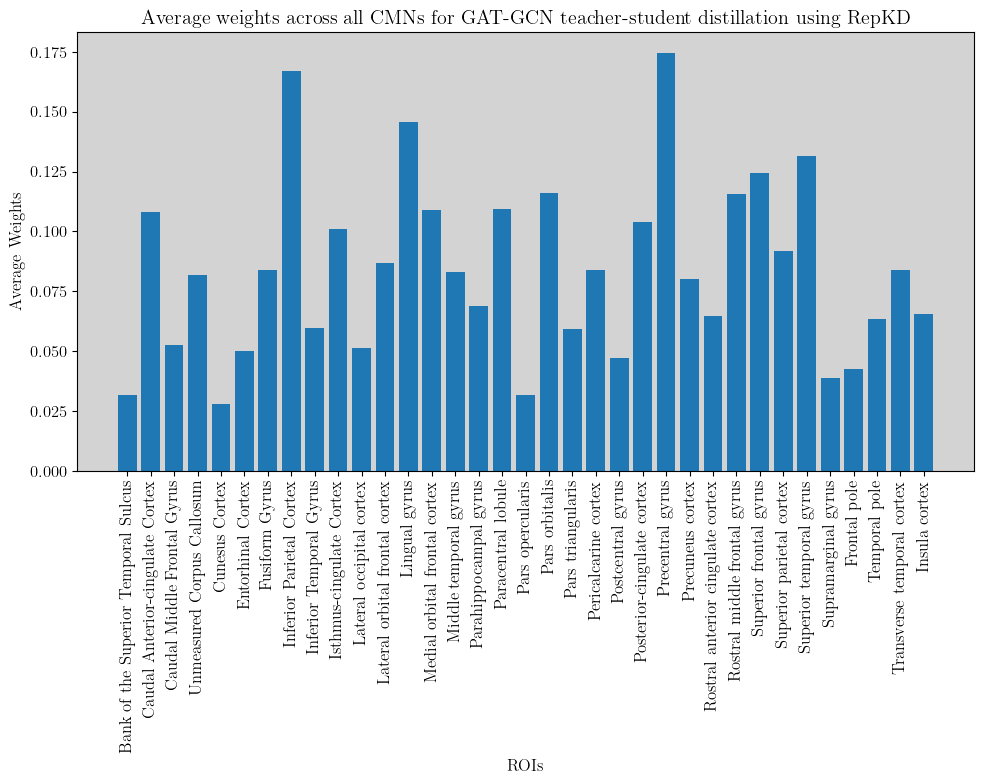

In [130]:
import numpy as np
import matplotlib.pyplot as plt

data = x
x = np.arange(len(labels))

plt.figure(figsize=(10, 8))
plt.bar(x, data, align='center')
plt.xticks(x, labels, rotation=90)
plt.gca().set_facecolor('lightgrey')
plt.xlabel('ROIs')
plt.ylabel('Average Weights')
plt.title('Average weights across all CMNs for GAT-GCN teacher-student distillation using RepKD')
plt.tight_layout()
plt.savefig('Average weights across all CMNs fro GAT-GCN teacher-student distillation using RepKD.pdf', format='pdf')
plt.show()


In [131]:
np.argsort(-x)

array([34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18,
       17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,
        0])

In [132]:
c = [23,  7, 12, 29, 27, 18, 26, 16, 13,  1, 22,  9, 28, 11, 20,  6, 33, 14]
d = [4, 5, 7, 10, 12, 21, 23, 24, 27]
list(set(c) & set(d))

[27, 12, 23, 7]

In [133]:
labels[27],  labels[12],  labels[23],  labels[7]

('Superior frontal gyrus',
 'Lingual gyrus',
 'Precentral gyrus',
 'Inferior Parietal Cortex')